# Importing Python Packages

In [39]:
import openpyxl
import xlrd
import os
import glob

from pandas import DataFrame as df
from scipy.stats import trim_mean, kurtosis
from scipy.stats.mstats import mode, gmean, hmean

import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf

In [40]:
# import python packages

# import nltk (natural language tool kit)
import nltk
# stopwords, FreqDist, word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import requests
from lxml import html
import csv
import pandas as pd

from os import path

import matplotlib.pyplot as plt
%matplotlib inline


#regular expression
import re
#csv
import csv
# Excel-like format
import pandas as pd
#data visualization
import matplotlib.pyplot as plt
% matplotlib inline

import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf

import seaborn as sns
np.random.seed(sum(map(ord, "aesthetics")))


# Importing Data

## Opening the Correct Directory

In [3]:
os.chdir('C:\\Users\\millsj.ADMIN\\Desktop\\GENBA 894\\2018_DataChallenges_Teradata\\National Teams\\')

In [4]:
# filenames
excel_names = ["2013-2017 National Team Activity.xlsx"]

# read them in
excels = [pd.ExcelFile(name) for name in excel_names]

# turn them into dataframes
frames = [x.parse(x.sheet_names[0],index_col=None) for x in excels]

# delete the first row for all frames except the first
# i.e. remove the header row -- assumes it's the first
frames[1:] = [df[1:] for df in frames[1:]]

# concatenate them..
nationalteams = pd.concat(frames)

# Check headers
nationalteams.head(3)

,National Team Name,Event Chapter,Event Category,Event Type,Local Team Name,Event Name,Event Start Date,Location,Corporate Name,Revenue Raised,...,Local Team Captain Call Status,Local Team Captain Contact By Phone OK? (Y/N),Local Team Captain City,Local Team Captain State/Province,Local Team Captain Zip Code,Local Team Captain Bad Address Flag,Local Team Captain Contact By Mail OK? (Y/N),Local Team Captain Active Flag,Local Team Captain Deceased Flag,Local Team Captain Primary Connection To MS
0,Chevron Bike Team,ALC,Bike,MS 150 (2 Day Bike),Chevron,ALC 2016 Bike MS: Mississippi 150,2016-10-08,NaN,NaN,1745.0,...,G,Yes,Mobile,AL,36695.0,No,No,Yes,No,None
1,EMD Serono Bike team,ALC,Bike,Bike 2 Day,EMD Serono,ALC 2017 Bike MS: Tour De Beach,2017-09-16,Hampton Inns and Suite,NaN,390.0,...,G,Yes,Mobile,AL,36608.0,No,Yes,Yes,No,Friend has MS
2,NaN,ALC,Bike,Bike 2 Day,Freewheelin',ALC 2017 Bike MS: Tour De Beach,2017-09-16,Hampton Inns and Suite,NaN,400.0,...,G,Yes,Pensacola,FL,32506.0,No,Yes,Yes,No,None


In [5]:
# convert string to integers
#biketeams['Team Captain Accept Email'] = (biketeams['Team Captain Accept Email'] == 'TRUE').astype(int)

In [7]:
# make sure the conversion worked
#biketeams.head(3)

# Looking for Data Anomalies

In [8]:
# List of all headers
# nationalteams['National Team Name','Event Chapter','Event Category','Event Type','Local Team Name','Event Name','Event Start Date','Location','Corporate Name','Revenue Raised','Number of Team Members (local)','Local Team Captain Member ID','Local Team Captain Contact ID','Local Team Captain Email Domain','Local Team Captain Bad Email Flag','Local Team Captain Contact By Email OK? (Y/N)','Local Team Captain Phone Type','Local Team Captain Call Status','Local Team Captain Contact By Phone OK? (Y/N)','Local Team Captain City','Local Team Captain State/Province','Local Team Captain Zip Code','Local Team Captain Bad Address Flag','Local Team Captain Contact By Mail OK? (Y/N)','Local Team Captain Active Flag','Local Team Captain Deceased Flag','Local Team Captain Primary Connection To MS']

In [9]:
# counting zero values
print((nationalteams[['National Team Name','Event Chapter','Event Category','Event Type','Local Team Name','Event Name','Event Start Date','Location','Corporate Name','Revenue Raised','Number of Team Members (local)','Local Team Captain Member ID','Local Team Captain Contact ID','Local Team Captain Email Domain','Local Team Captain Bad Email Flag','Local Team Captain Contact By Email OK? (Y/N)','Local Team Captain Phone Type','Local Team Captain Call Status','Local Team Captain Contact By Phone OK? (Y/N)','Local Team Captain City','Local Team Captain State/Province','Local Team Captain Zip Code','Local Team Captain Bad Address Flag','Local Team Captain Contact By Mail OK? (Y/N)','Local Team Captain Active Flag','Local Team Captain Deceased Flag','Local Team Captain Primary Connection To MS']] == 0).sum())


National Team Name                                0
Event Chapter                                     0
Event Category                                    0
Event Type                                        0
Local Team Name                                   0
Event Name                                        0
Event Start Date                                  0
Location                                          0
Corporate Name                                    0
Revenue Raised                                   83
Number of Team Members (local)                    0
Local Team Captain Member ID                      0
Local Team Captain Contact ID                     0
Local Team Captain Email Domain                   0
Local Team Captain Bad Email Flag                 0
Local Team Captain Contact By Email OK? (Y/N)     0
Local Team Captain Phone Type                     0
Local Team Captain Call Status                    0
Local Team Captain Contact By Phone OK? (Y/N)     0
Local Team C

In [10]:
# Counting missing values
nationalteamsnull=(nationalteams[['National Team Name','Event Chapter','Event Category','Event Type','Local Team Name','Event Name','Event Start Date','Location','Corporate Name','Revenue Raised','Number of Team Members (local)','Local Team Captain Member ID','Local Team Captain Contact ID','Local Team Captain Email Domain','Local Team Captain Bad Email Flag','Local Team Captain Contact By Email OK? (Y/N)','Local Team Captain Phone Type','Local Team Captain Call Status','Local Team Captain Contact By Phone OK? (Y/N)','Local Team Captain City','Local Team Captain State/Province','Local Team Captain Zip Code','Local Team Captain Bad Address Flag','Local Team Captain Contact By Mail OK? (Y/N)','Local Team Captain Active Flag','Local Team Captain Deceased Flag','Local Team Captain Primary Connection To MS']])

print(nationalteamsnull.isnull().sum())




National Team Name                               269
Event Chapter                                    107
Event Category                                   107
Event Type                                       107
Local Team Name                                  107
Event Name                                       107
Event Start Date                                 107
Location                                         297
Corporate Name                                   917
Revenue Raised                                   107
Number of Team Members (local)                   170
Local Team Captain Member ID                     167
Local Team Captain Contact ID                    167
Local Team Captain Email Domain                  167
Local Team Captain Bad Email Flag                167
Local Team Captain Contact By Email OK? (Y/N)    167
Local Team Captain Phone Type                    175
Local Team Captain Call Status                   175
Local Team Captain Contact By Phone OK? (Y/N) 

In [ ]:
nationalteams['Local Team Captain Primary Connection To MS'].value_counts()

In [ ]:
nationalteams['Local Team Captain State/Province'].value_counts()

In [ ]:
nationalteams['Local Team Captain Primary Connection To MS'].value_counts()

# Data Analysis

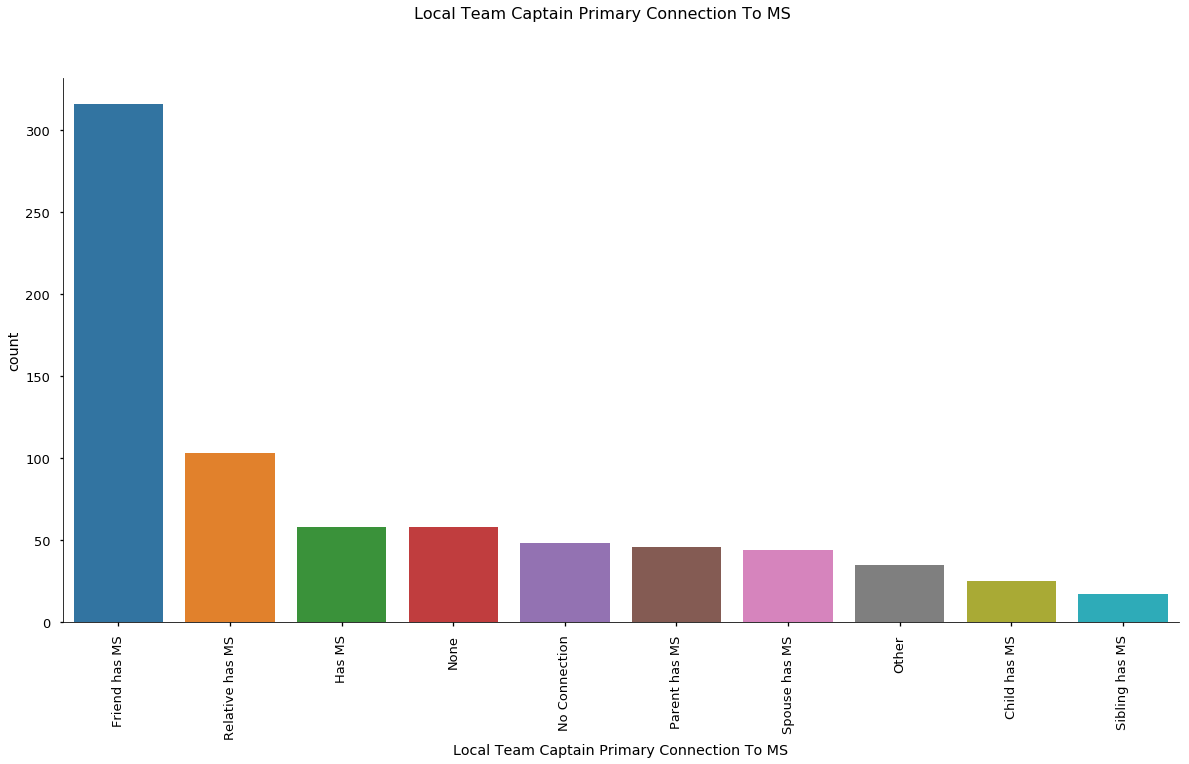

In [6]:
plt.figure(figsize=(20,10))
sns.set_context("talk")
sns.countplot(x='Local Team Captain Primary Connection To MS', data=nationalteams,order = nationalteams['Local Team Captain Primary Connection To MS'].value_counts().index)
plt.xticks(rotation=90)
plt.suptitle('Local Team Captain Primary Connection To MS', fontsize=16)
sns.despine()


Text(0.5,0.98,'Local Team Captain Primary Connection to MS by Revenue raised and OK to Email')

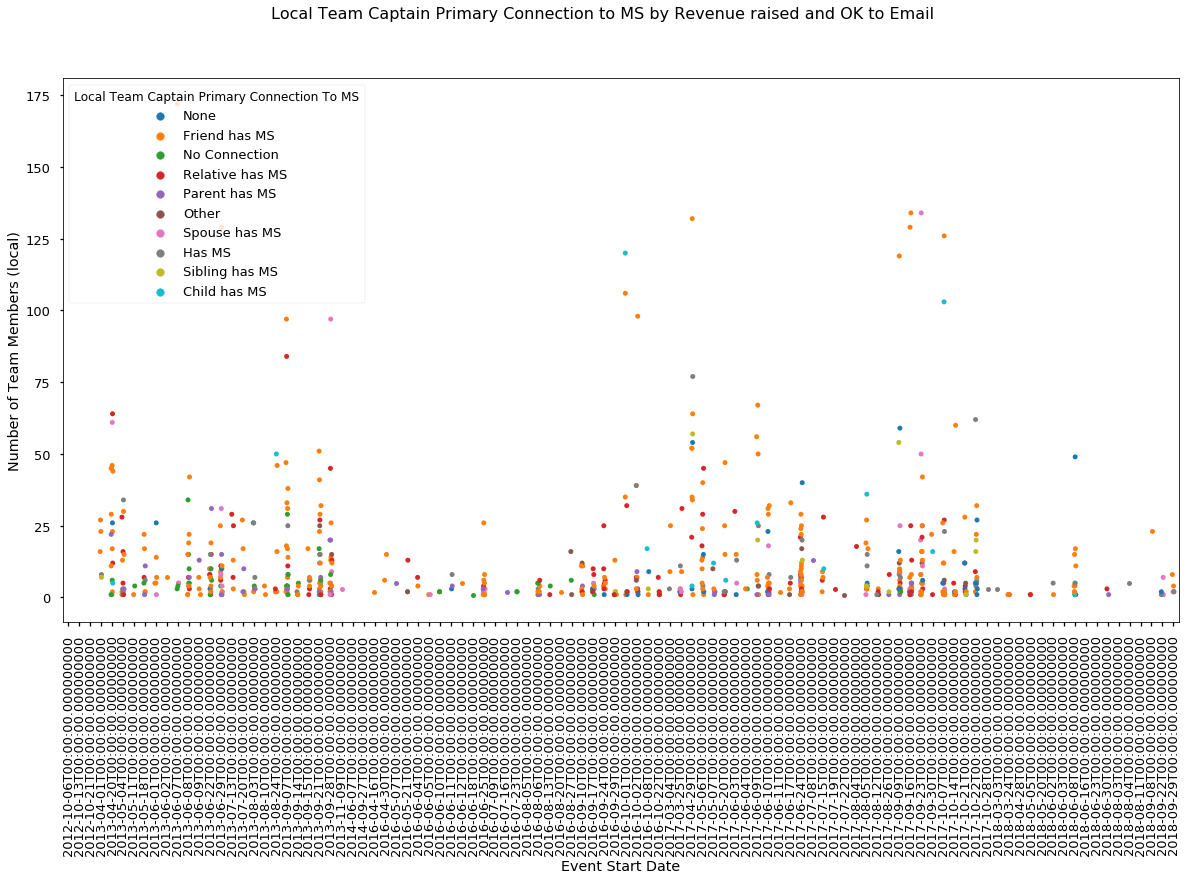

In [10]:
plt.figure(figsize=(20,10))

sns.stripplot(x='Event Start Date',y="Number of Team Members (local)",hue="Local Team Captain Primary Connection To MS", data=nationalteams, jitter=True)
plt.xticks(rotation=90)
plt.suptitle('Local Team Captain Primary Connection to MS by Revenue raised and OK to Email', fontsize=16)



In [12]:
#compute count of values in columns
nationalteams['Local Team Captain Primary Connection To MS'].value_counts()

Friend has MS      316
Relative has MS    103
None                58
Has MS              58
No Connection       48
Parent has MS       46
Spouse has MS       44
Other               35
Child has MS        25
Sibling has MS      17
Name: Local Team Captain Primary Connection To MS, dtype: int64

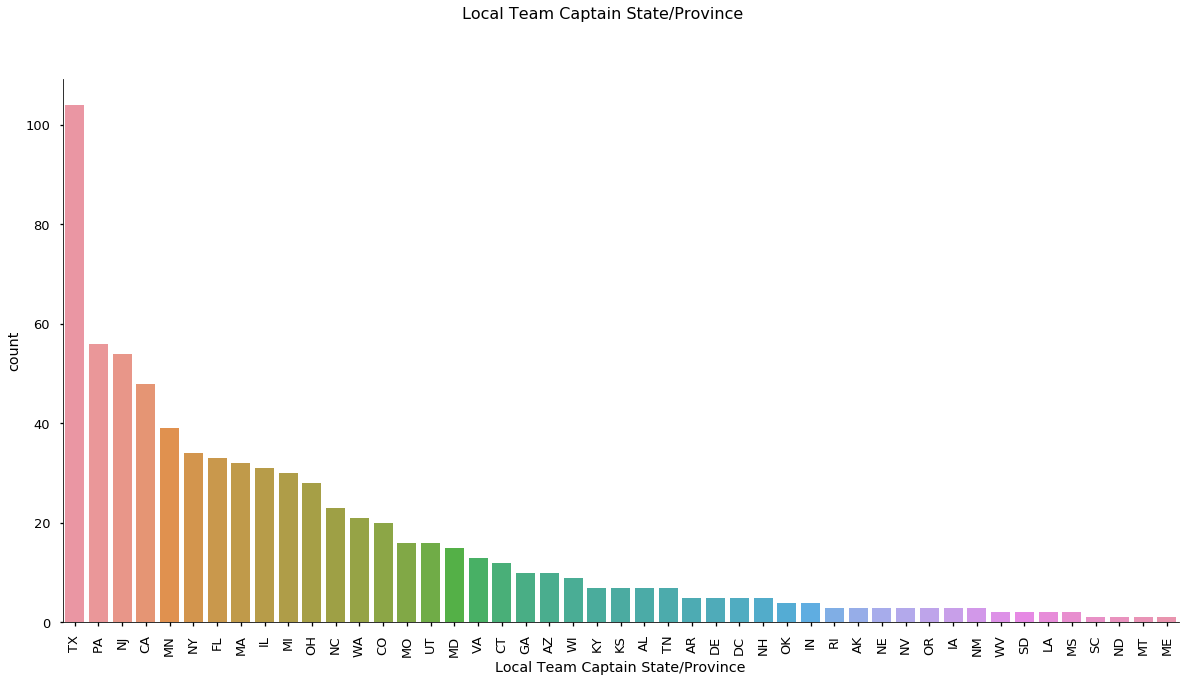

In [13]:
#sns.set_context("paper")
plt.figure(figsize=(20,10))
sns.countplot(x='Local Team Captain State/Province', data=nationalteams,order = nationalteams['Local Team Captain State/Province'].value_counts().index)
plt.xticks(rotation=90)
plt.suptitle('Local Team Captain State/Province', fontsize=16)

sns.despine()
#plt.tight_layout()

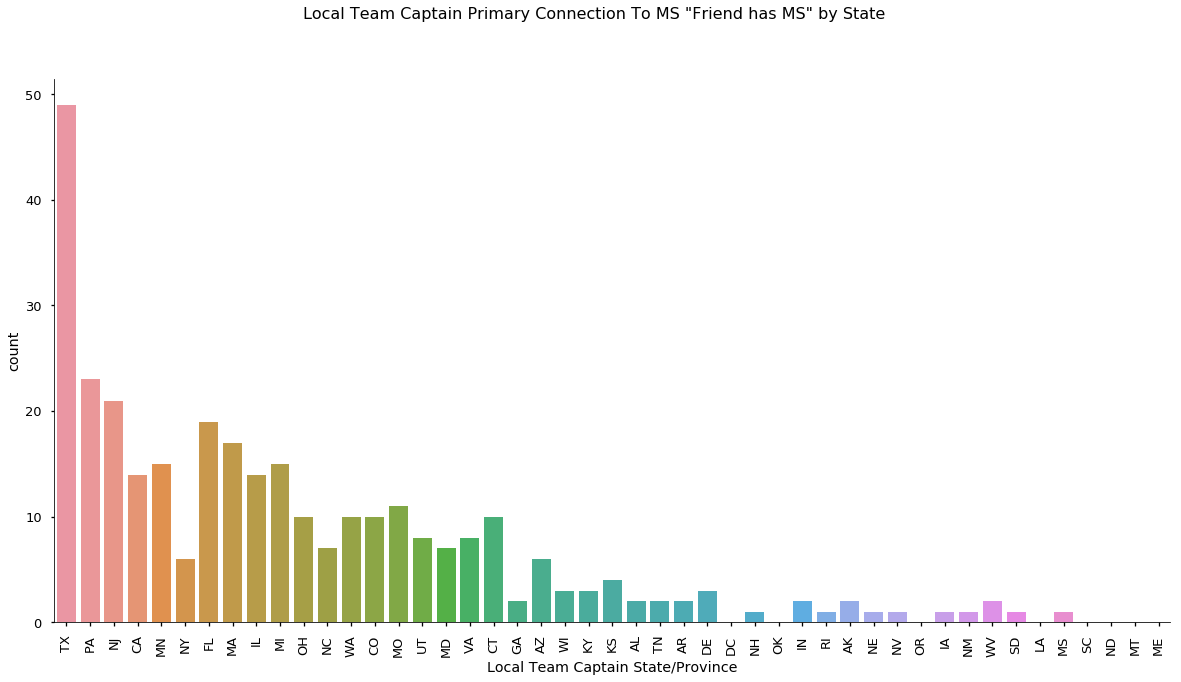

In [14]:

#sns.set_context("paper")
plt.figure(figsize=(20,10))

sns.countplot(x='Local Team Captain State/Province', data=nationalteams[nationalteams['Local Team Captain Primary Connection To MS'] == 'Friend has MS'],order = nationalteams['Local Team Captain State/Province'].value_counts().index)
plt.xticks(rotation=90)
plt.suptitle('Local Team Captain Primary Connection To MS "Friend has MS" by State', fontsize=16)

sns.despine()

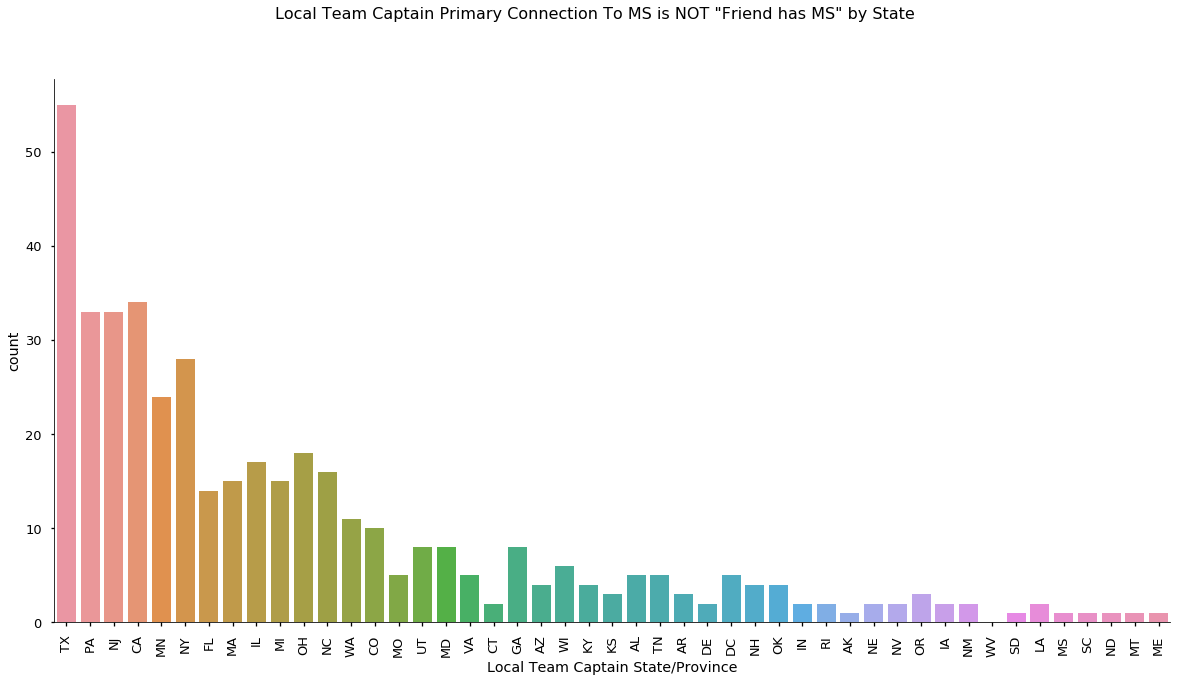

In [15]:

#sns.set_context("paper")
plt.figure(figsize=(20,10))

sns.countplot(x='Local Team Captain State/Province', data=nationalteams[nationalteams['Local Team Captain Primary Connection To MS'] != 'Friend has MS'],order = nationalteams['Local Team Captain State/Province'].value_counts().index)
plt.xticks(rotation=90)
plt.suptitle('Local Team Captain Primary Connection To MS is NOT "Friend has MS" by State', fontsize=16)

sns.despine()

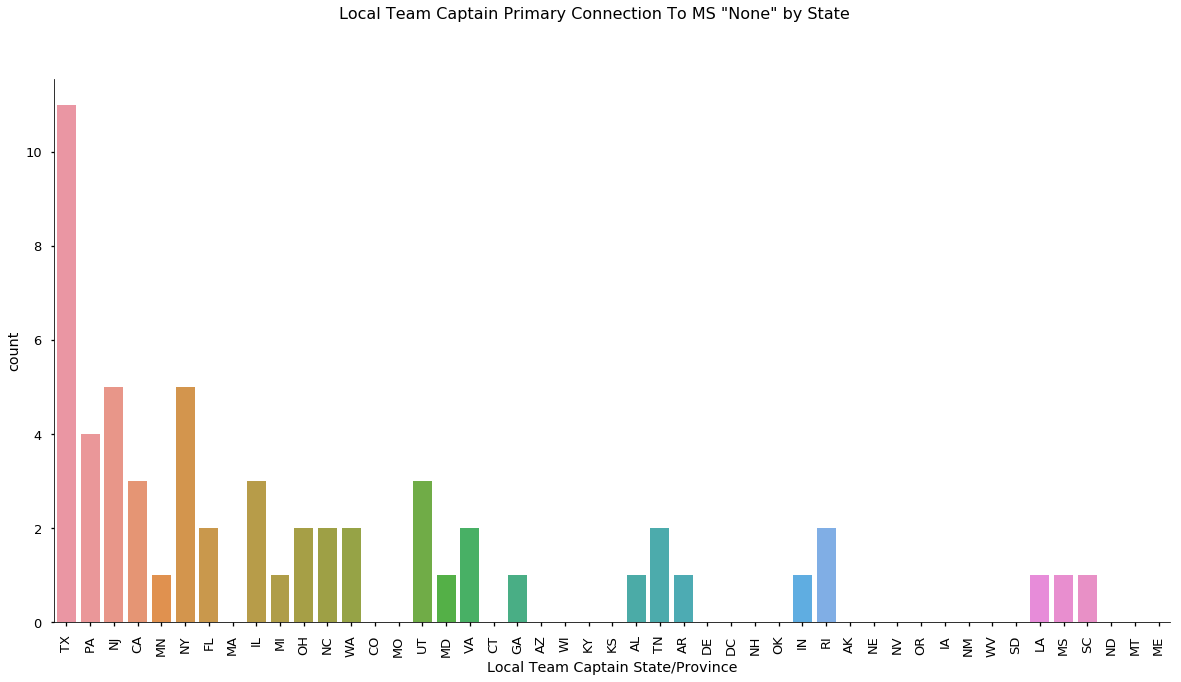

In [16]:

#sns.set_context("paper")
plt.figure(figsize=(20,10))

sns.countplot(x='Local Team Captain State/Province', data=nationalteams[nationalteams['Local Team Captain Primary Connection To MS'] == 'None'],order = nationalteams['Local Team Captain State/Province'].value_counts().index)
plt.xticks(rotation=90)
plt.suptitle('Local Team Captain Primary Connection To MS "None" by State', fontsize=16)

sns.despine()

In [17]:
#compute count of values in columns
nationalteams['Local Team Captain Email Domain'].value_counts()

gmail.com                    215
yahoo.com                     85
hotmail.com                   45
aol.com                       28
comcast.net                   19
deloitte.com                  19
msn.com                       14
salesforce.com                12
sbcglobal.net                 10
kpmg.com                       9
wellsfargo.com                 8
pointb.com                     8
att.net                        8
ey.com                         7
nmss.org                       7
fmr.com                        7
cable.comcast.com              6
teamwingman.org                6
biogen.com                     5
live.com                       5
teamaudreysheroes.org          5
me.com                         5
cisco.com                      5
us.pwc.com                     5
accenture.com                  5
swbell.net                     5
verizon.net                    5
microsoft.com                  4
bm.com                         4
pepsico.com                    4
          

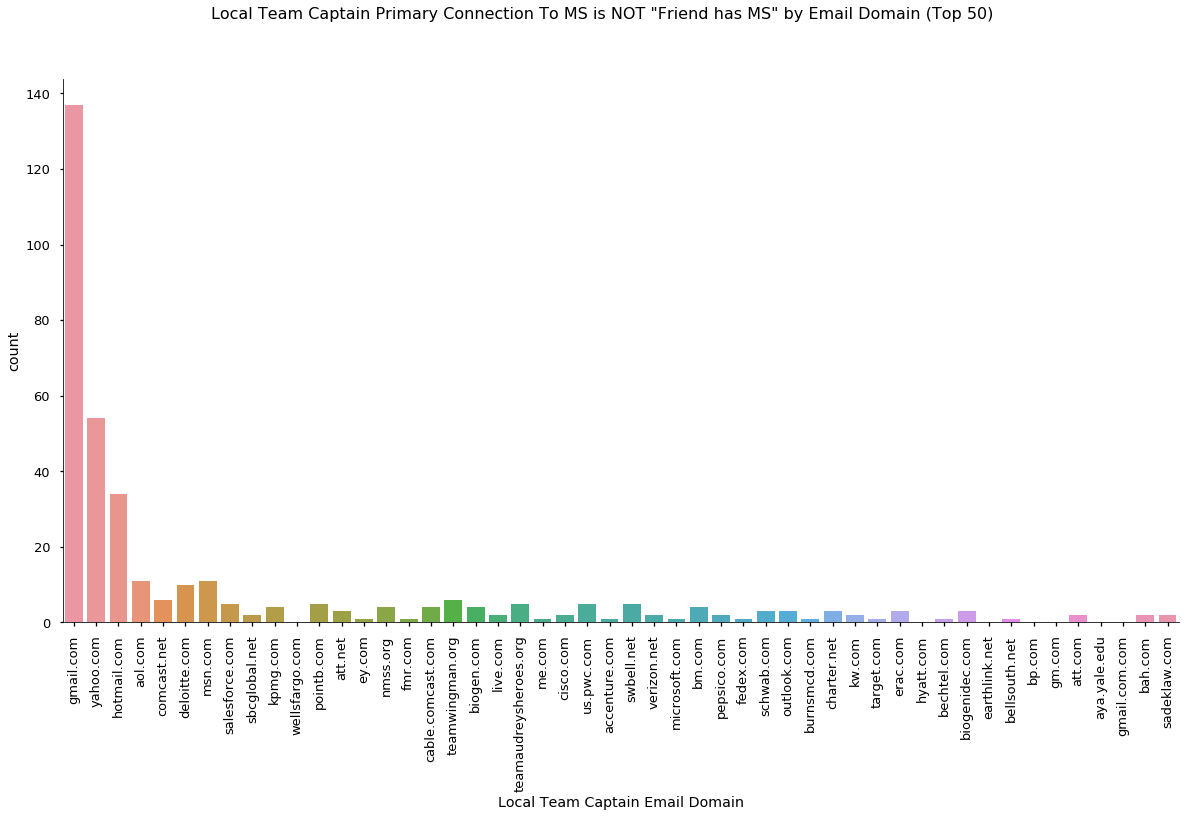

In [19]:
#sns.set_context("paper")
plt.figure(figsize=(20,10))
sns.countplot(x='Local Team Captain Email Domain', data=nationalteams[nationalteams['Local Team Captain Primary Connection To MS'] != 'Friend has MS'],order = nationalteams['Local Team Captain Email Domain'].value_counts().iloc[:50].index)
plt.xticks(rotation=90)
plt.suptitle('Local Team Captain Primary Connection To MS is NOT "Friend has MS" by Email Domain (Top 50)', fontsize=16)

sns.despine()
#plt.tight_layout()

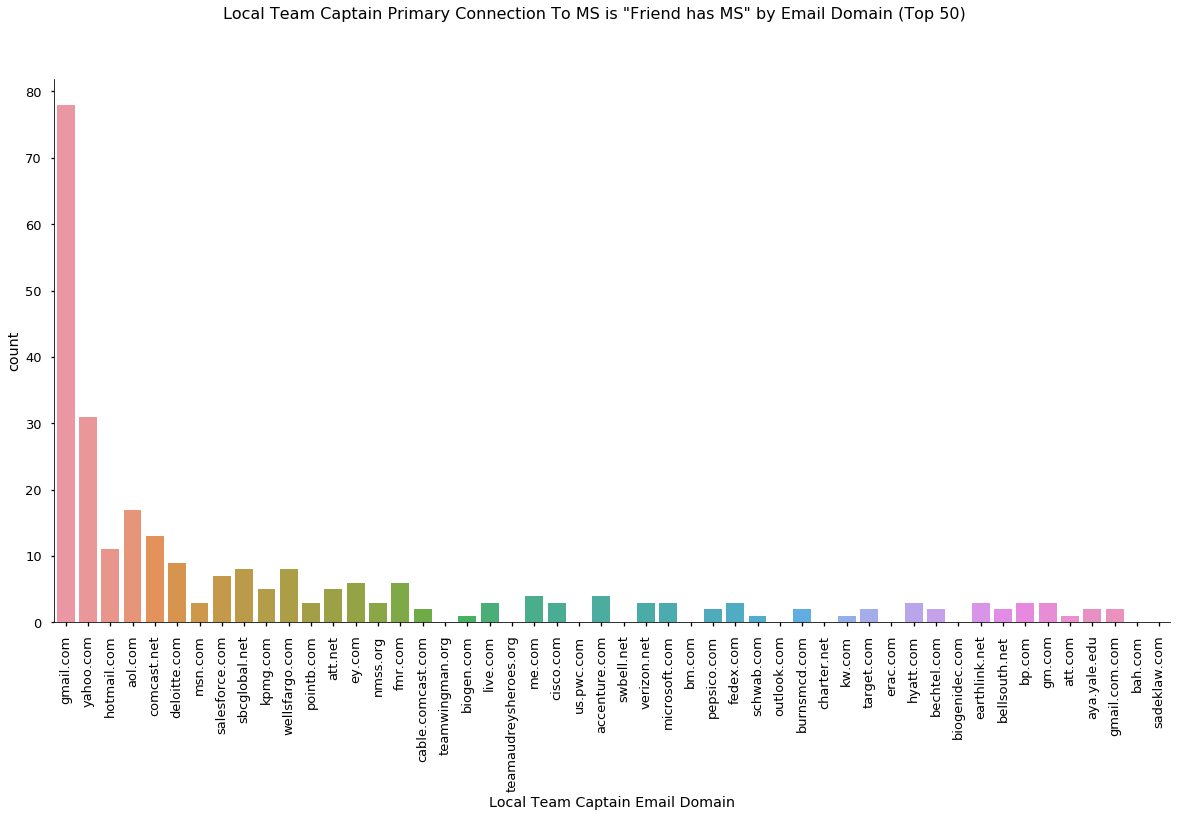

In [20]:
#sns.set_context("paper")
plt.figure(figsize=(20,10))
sns.countplot(x='Local Team Captain Email Domain', data=nationalteams[nationalteams['Local Team Captain Primary Connection To MS'] == 'Friend has MS'],order = nationalteams['Local Team Captain Email Domain'].value_counts().iloc[:50].index)
plt.xticks(rotation=90)
plt.suptitle('Local Team Captain Primary Connection To MS is "Friend has MS" by Email Domain (Top 50)', fontsize=16)


sns.despine()
#plt.tight_layout()

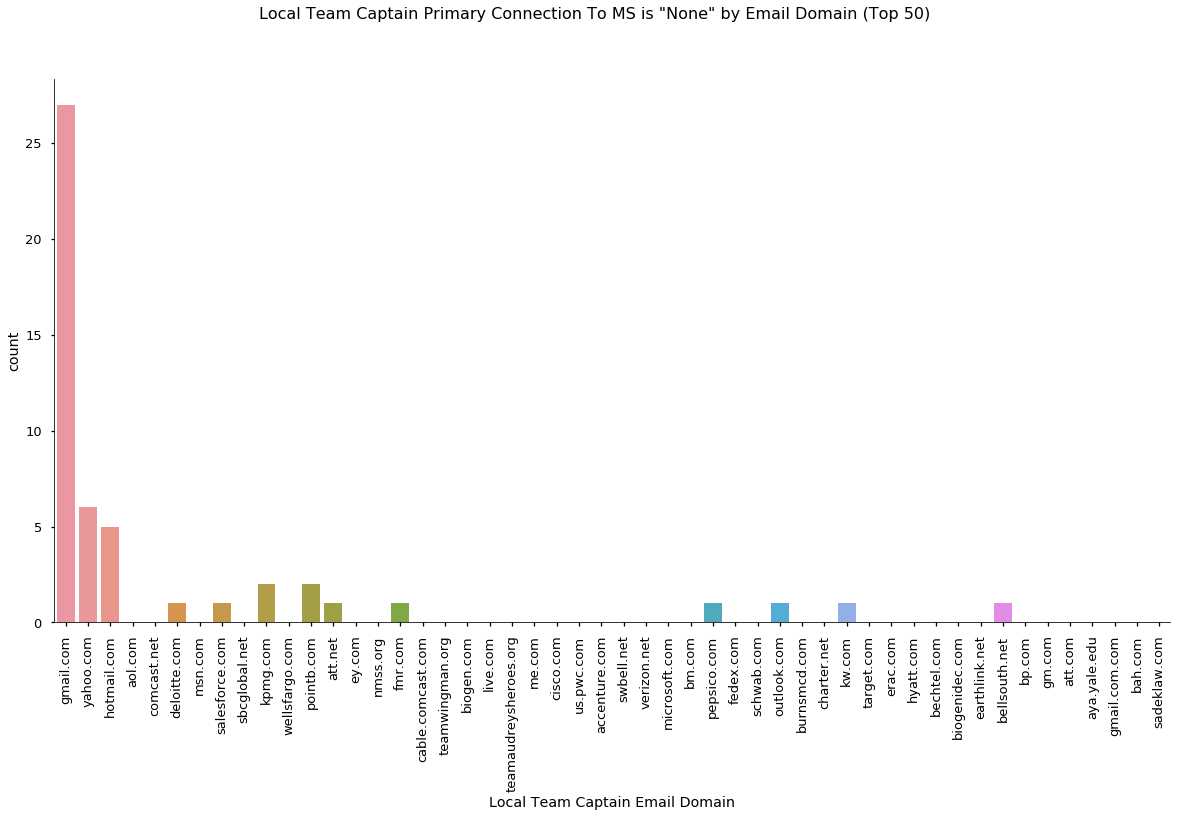

In [21]:
#sns.set_context("paper")
plt.figure(figsize=(20,10))
sns.countplot(x='Local Team Captain Email Domain', data=nationalteams[nationalteams['Local Team Captain Primary Connection To MS'] == 'None'],order = nationalteams['Local Team Captain Email Domain'].value_counts().iloc[:50].index)
plt.xticks(rotation=90)
plt.suptitle('Local Team Captain Primary Connection To MS is "None" by Email Domain (Top 50)', fontsize=16)


sns.despine()
#plt.tight_layout()

In [12]:
#compute count of values in columns
nationalteams['Local Team Captain Contact By Email OK? (Y/N)'].value_counts()

Yes    576
No     174
Name: Local Team Captain Contact By Email OK? (Y/N), dtype: int64

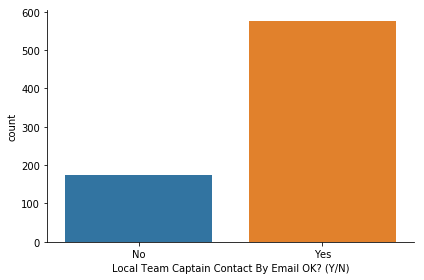

In [19]:
sns.countplot(x='Local Team Captain Contact By Email OK? (Y/N)', data=nationalteams)
sns.despine()
plt.tight_layout()

In [134]:
#compute count of values in columns
nationalteams['Revenue Raised'].value_counts()

0.00        83
50.00       16
100.00      14
35.00        9
300.00       9
1000.00      8
250.00       8
150.00       7
500.00       7
600.00       6
25.00        5
200.00       4
350.00       4
70.00        4
400.00       4
125.00       4
1060.00      3
1870.00      3
375.00       3
450.00       3
700.00       3
935.00       2
1835.00      2
885.00       2
725.00       2
650.00       2
535.00       2
800.00       2
930.00       2
290.00       2
            ..
29809.02     1
11093.35     1
71127.36     1
31507.00     1
2875.00      1
5015.00      1
5170.00      1
97819.62     1
22080.10     1
5365.00      1
4550.00      1
21845.20     1
25598.47     1
6034.99      1
1345.00      1
23103.40     1
12704.16     1
11610.00     1
12040.00     1
3615.00      1
1906.00      1
1110.00      1
2010.00      1
8020.00      1
5029.88      1
641.00       1
1615.00      1
1430.00      1
2420.00      1
390.00       1
Name: Revenue Raised, Length: 579, dtype: int64

In [17]:
nationalteams['Local Team Captain State/Province'].value_counts()

TX    104
PA     56
NJ     54
CA     48
MN     39
NY     34
FL     33
MA     32
IL     31
MI     30
OH     28
NC     23
WA     21
CO     20
MO     16
UT     16
MD     15
VA     13
CT     12
AZ     10
GA     10
WI      9
KY      7
KS      7
TN      7
AL      7
AR      5
DE      5
NH      5
DC      5
IN      4
OK      4
IA      3
AK      3
RI      3
OR      3
NM      3
NE      3
NV      3
MS      2
SD      2
WV      2
LA      2
ME      1
SC      1
ND      1
MT      1
Name: Local Team Captain State/Province, dtype: int64

Text(0.5,0.98,'Local Team Captain Primary Connection to MS by Revenue raised and OK to Email')

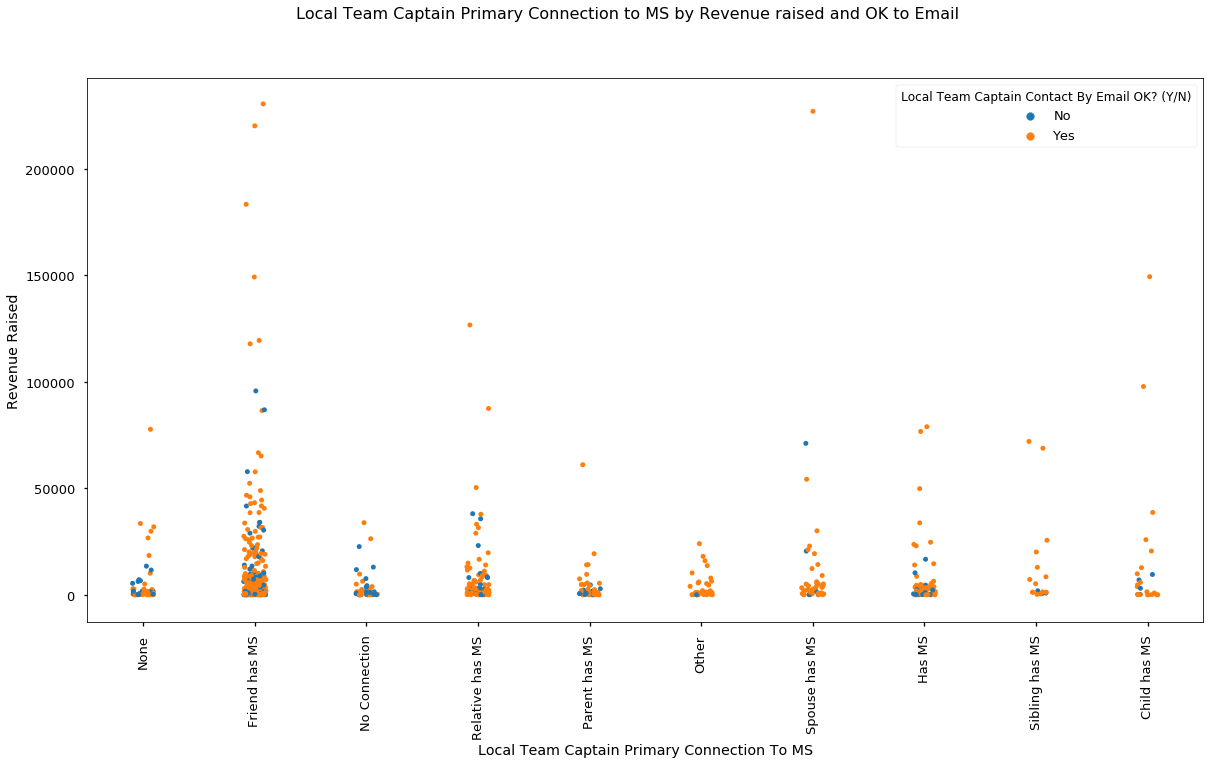

In [152]:
plt.figure(figsize=(20,10))

sns.stripplot(x="Local Team Captain Primary Connection To MS", y="Revenue Raised", hue="Local Team Captain Contact By Email OK? (Y/N)",data=nationalteams, jitter=True)
plt.xticks(rotation=90)
plt.suptitle('Local Team Captain Primary Connection to MS by Revenue raised and OK to Email', fontsize=16)



Text(0.5,0.98,'Local Team Captain State/Province by Revenue raised and Local Team Captain Primary Connection to MS')

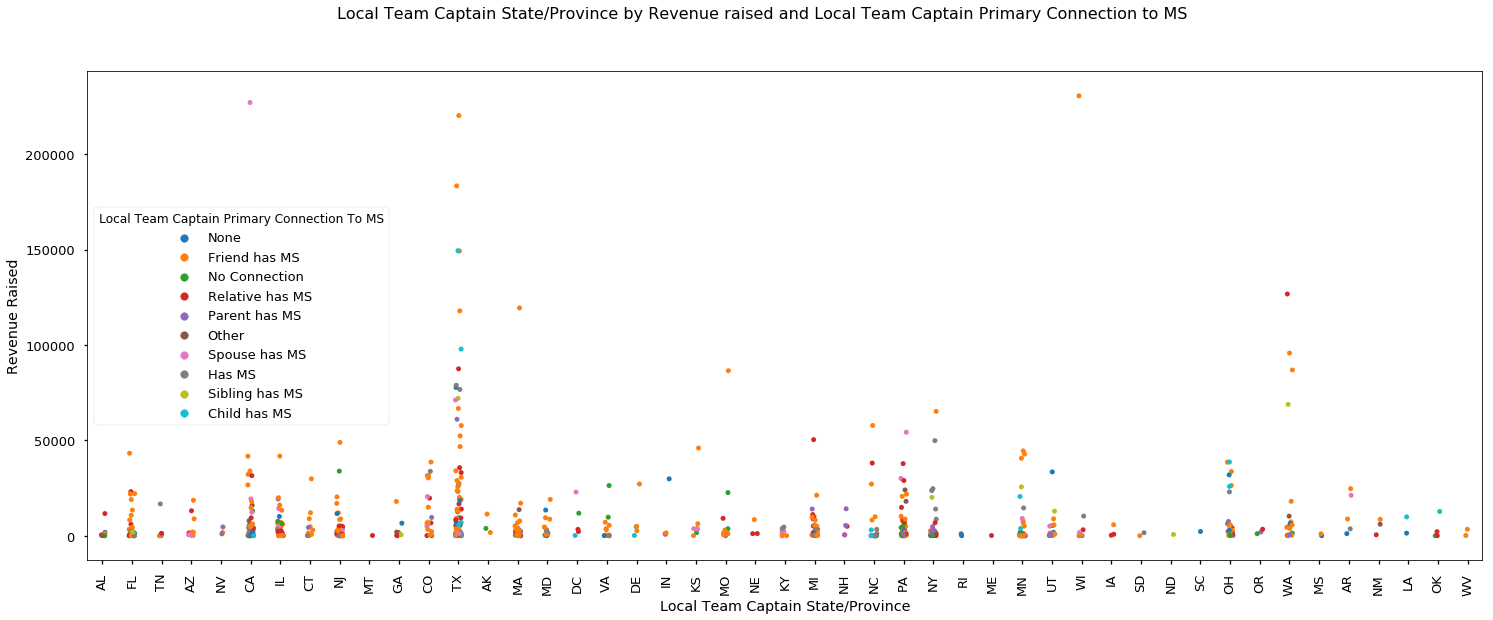

In [146]:
plt.figure(figsize=(25,9))

sns.stripplot(x="Local Team Captain State/Province", y="Revenue Raised", hue="Local Team Captain Primary Connection To MS",data=nationalteams, jitter=True)
plt.xticks(rotation=90)
plt.suptitle('Local Team Captain State/Province by Revenue raised and Local Team Captain Primary Connection to MS', fontsize=16)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text xticklabel objects>)

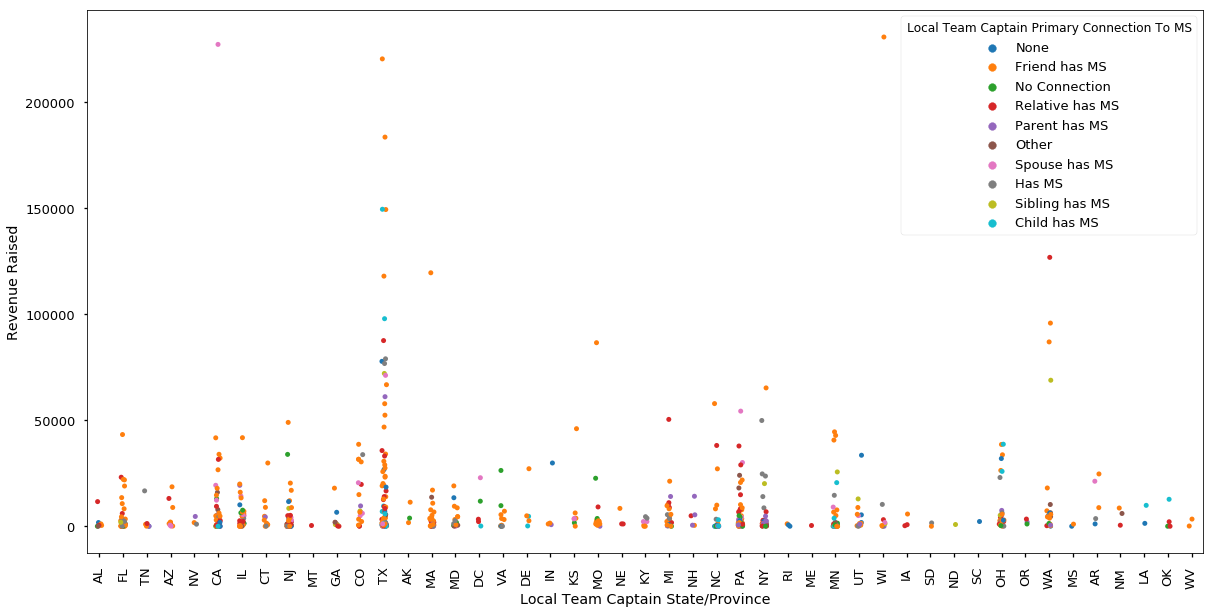

In [161]:
plt.figure(figsize=(20,10))

sns.stripplot(x="Local Team Captain State/Province", y="Revenue Raised",hue="Local Team Captain Primary Connection To MS",data=nationalteams, jitter=True)
plt.xticks(rotation=90)



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70]), <a list of 71 Text xticklabel objects>)

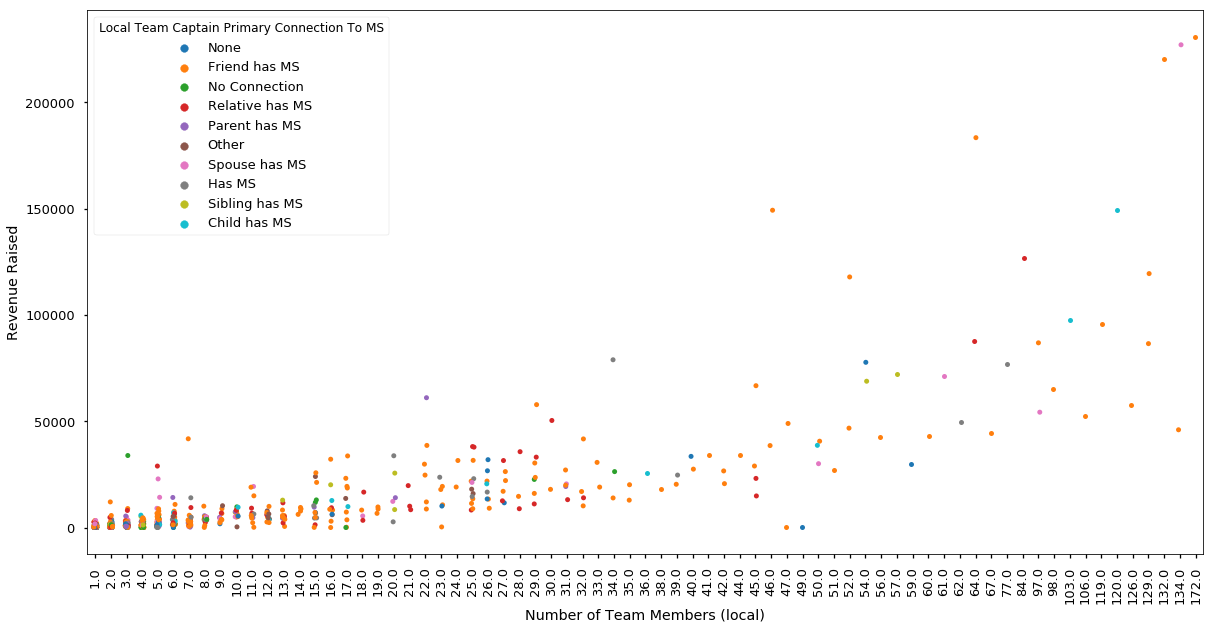

In [162]:
plt.figure(figsize=(20,10))

sns.stripplot(x="Number of Team Members (local)", y="Revenue Raised",hue="Local Team Captain Primary Connection To MS",data=nationalteams, jitter=True)
plt.xticks(rotation=90)

# Describing Data

In [11]:
dummy = pd.get_dummies(nationalteams['Local Team Captain Primary Connection To MS'])
nationalteamsd = pd.concat([nationalteams, dummy],axis=1)
nationalteamsd.head()


,National Team Name,Event Chapter,Event Category,Event Type,Local Team Name,Event Name,Event Start Date,Location,Corporate Name,Revenue Raised,...,Child has MS,Friend has MS,Has MS,No Connection,None,Other,Parent has MS,Relative has MS,Sibling has MS,Spouse has MS
0,Chevron Bike Team,ALC,Bike,MS 150 (2 Day Bike),Chevron,ALC 2016 Bike MS: Mississippi 150,2016-10-08,NaN,NaN,1745.0,...,0,0,0,0,1,0,0,0,0,0
1,EMD Serono Bike team,ALC,Bike,Bike 2 Day,EMD Serono,ALC 2017 Bike MS: Tour De Beach,2017-09-16,Hampton Inns and Suite,NaN,390.0,...,0,1,0,0,0,0,0,0,0,0
2,NaN,ALC,Bike,Bike 2 Day,Freewheelin',ALC 2017 Bike MS: Tour De Beach,2017-09-16,Hampton Inns and Suite,NaN,400.0,...,0,0,0,0,1,0,0,0,0,0
3,NaN,ALC,Bike,Bike 2 Day,Team Rekosh Martin,ALC 2017 Bike MS: Tour De Beach,2017-09-16,Hampton Inns and Suite,NaN,0.0,...,0,0,0,0,1,0,0,0,0,0
4,NaN,ALC,Bike,MS 150 (2 Day Bike),Bike Link Racing,2013 Bike MS - Tour de Beach,2013-09-21,NaN,NaN,1085.0,...,0,1,0,0,0,0,0,0,0,0


In [12]:
dummy = pd.get_dummies(nationalteams['Local Team Captain State/Province'])
nationalteamsd = pd.concat([nationalteamsd, dummy],axis=1)
nationalteamsd.head()

,National Team Name,Event Chapter,Event Category,Event Type,Local Team Name,Event Name,Event Start Date,Location,Corporate Name,Revenue Raised,...,RI,SC,SD,TN,TX,UT,VA,WA,WI,WV
0,Chevron Bike Team,ALC,Bike,MS 150 (2 Day Bike),Chevron,ALC 2016 Bike MS: Mississippi 150,2016-10-08,NaN,NaN,1745.0,...,0,0,0,0,0,0,0,0,0,0
1,EMD Serono Bike team,ALC,Bike,Bike 2 Day,EMD Serono,ALC 2017 Bike MS: Tour De Beach,2017-09-16,Hampton Inns and Suite,NaN,390.0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,ALC,Bike,Bike 2 Day,Freewheelin',ALC 2017 Bike MS: Tour De Beach,2017-09-16,Hampton Inns and Suite,NaN,400.0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,ALC,Bike,Bike 2 Day,Team Rekosh Martin,ALC 2017 Bike MS: Tour De Beach,2017-09-16,Hampton Inns and Suite,NaN,0.0,...,0,0,0,1,0,0,0,0,0,0
4,NaN,ALC,Bike,MS 150 (2 Day Bike),Bike Link Racing,2013 Bike MS - Tour de Beach,2013-09-21,NaN,NaN,1085.0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
dummy = pd.get_dummies(nationalteams['Local Team Captain Contact By Mail OK? (Y/N)'])
nationalteamsd = pd.concat([nationalteamsd, dummy],axis=1)
nationalteamsd.head()

,National Team Name,Event Chapter,Event Category,Event Type,Local Team Name,Event Name,Event Start Date,Location,Corporate Name,Revenue Raised,...,SD,TN,TX,UT,VA,WA,WI,WV,No,Yes
0,Chevron Bike Team,ALC,Bike,MS 150 (2 Day Bike),Chevron,ALC 2016 Bike MS: Mississippi 150,2016-10-08,NaN,NaN,1745.0,...,0,0,0,0,0,0,0,0,1,0
1,EMD Serono Bike team,ALC,Bike,Bike 2 Day,EMD Serono,ALC 2017 Bike MS: Tour De Beach,2017-09-16,Hampton Inns and Suite,NaN,390.0,...,0,0,0,0,0,0,0,0,0,1
2,NaN,ALC,Bike,Bike 2 Day,Freewheelin',ALC 2017 Bike MS: Tour De Beach,2017-09-16,Hampton Inns and Suite,NaN,400.0,...,0,0,0,0,0,0,0,0,0,1
3,NaN,ALC,Bike,Bike 2 Day,Team Rekosh Martin,ALC 2017 Bike MS: Tour De Beach,2017-09-16,Hampton Inns and Suite,NaN,0.0,...,0,1,0,0,0,0,0,0,1,0
4,NaN,ALC,Bike,MS 150 (2 Day Bike),Bike Link Racing,2013 Bike MS - Tour de Beach,2013-09-21,NaN,NaN,1085.0,...,0,0,0,0,0,0,0,0,1,0


In [67]:
nationalteamsd=nationalteamsd.fillna(0)
nationalteamsd

,National Team Name,Event Chapter,Event Category,Event Type,Local Team Name,Event Name,Event Start Date,Location,Corporate Name,Revenue Raised,...,SD,TN,TX,UT,VA,WA,WI,WV,No,Yes
0,Chevron Bike Team,ALC,Bike,MS 150 (2 Day Bike),Chevron,ALC 2016 Bike MS: Mississippi 150,2016-10-08 00:00:00,0,0.0,1745.00,...,0,0,0,0,0,0,0,0,1,0
1,EMD Serono Bike team,ALC,Bike,Bike 2 Day,EMD Serono,ALC 2017 Bike MS: Tour De Beach,2017-09-16 00:00:00,Hampton Inns and Suite,0.0,390.00,...,0,0,0,0,0,0,0,0,0,1
2,0,ALC,Bike,Bike 2 Day,Freewheelin',ALC 2017 Bike MS: Tour De Beach,2017-09-16 00:00:00,Hampton Inns and Suite,0.0,400.00,...,0,0,0,0,0,0,0,0,0,1
3,0,ALC,Bike,Bike 2 Day,Team Rekosh Martin,ALC 2017 Bike MS: Tour De Beach,2017-09-16 00:00:00,Hampton Inns and Suite,0.0,0.00,...,0,1,0,0,0,0,0,0,1,0
4,0,ALC,Bike,MS 150 (2 Day Bike),Bike Link Racing,2013 Bike MS - Tour de Beach,2013-09-21 00:00:00,0,0.0,1085.00,...,0,0,0,0,0,0,0,0,1,0
5,0,ALC,Bike,MS 150 (2 Day Bike),Mobilians on Bikes,ALC 2016 Bike MS: Tour de Beach,2016-09-17 00:00:00,"Orange Beach, AL",0.0,0.00,...,0,0,0,0,0,0,0,0,1,0
6,0,ALC,Bike,MS 150 (2 Day Bike),Team Rekosh,ALC 2016 Bike MS: Tour de Beach,2016-09-17 00:00:00,"Orange Beach, AL",0.0,1000.00,...,0,1,0,0,0,0,0,0,1,0
7,State Farm Bike Team,ALC,Bike,Bike 2 Day,State Farm Bike Team,ALC 2017 Bike MS: Tour De Beach,2017-09-16 00:00:00,Hampton Inns and Suite,0.0,11610.00,...,0,0,0,0,0,0,0,0,0,1
8,State Farm Bike Team,ALC,Bike,MS 150 (2 Day Bike),State Farm Bike Team,ALC 2016 Bike MS: Tour de Beach,2016-09-17 00:00:00,"Orange Beach, AL",0.0,425.00,...,0,0,0,0,0,0,0,0,0,1
9,American Express Bike Team,AZA,Bike,MS 150 (2 Day Bike),Ride For Life,AZA 2018 Bike MS: Arizona,2018-03-24 00:00:00,"Fort McDowell, AZ",0.0,100.00,...,0,0,0,0,0,0,0,0,0,1


In [68]:
nationalteamsd.describe()

,Corporate Name,Revenue Raised,Number of Team Members (local),Local Team Captain Member ID,Local Team Captain Contact ID,Local Team Captain Zip Code,Child has MS,Friend has MS,Has MS,No Connection,...,SD,TN,TX,UT,VA,WA,WI,WV,No,Yes
count,917.0,917.000000,917.000000,9.170000e+02,9.170000e+02,917.000000,917.000000,917.000000,917.000000,917.000000,...,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,0.0,7788.356020,9.633588,5.745600e+07,7.799825e+06,38710.970556,0.027263,0.344602,0.063250,0.052345,...,0.002181,0.007634,0.113413,0.017448,0.014177,0.022901,0.009815,0.002181,0.126499,0.691385
std,0.0,21142.975713,18.532719,3.096138e+07,5.797704e+06,33155.149149,0.162937,0.475498,0.243544,0.222843,...,0.046676,0.087084,0.317270,0.131006,0.118283,0.149669,0.098635,0.046676,0.332593,0.462174
min,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,70.000000,1.000000,4.571372e+07,2.071938e+06,7032.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,1120.000000,3.000000,6.168585e+07,8.231691e+06,32824.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.0,5385.010000,10.000000,8.299402e+07,1.365095e+07,75024.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,0.0,230589.240000,172.000000,9.126578e+07,1.633998e+07,99507.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
nationalteamsd.corr()


,Corporate Name,Revenue Raised,Number of Team Members (local),Local Team Captain Member ID,Local Team Captain Contact ID,Local Team Captain Zip Code,Child has MS,Friend has MS,Has MS,No Connection,...,SD,TN,TX,UT,VA,WA,WI,WV,No,Yes
Corporate Name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Revenue Raised,NaN,1.000000,0.851955,0.069600,-0.018130,0.223385,0.062328,0.136446,0.002997,-0.046521,...,-0.015506,-0.020542,0.235335,-0.018103,-0.019552,0.099927,0.092797,-0.013393,0.049464,0.093887
Number of Team Members (local),NaN,0.851955,1.000000,0.119771,0.012556,0.243789,0.069472,0.191251,0.005624,-0.051127,...,-0.018006,-0.018558,0.180489,-0.007706,-0.020038,0.128581,0.070052,-0.018006,0.117339,0.094866
Local Team Captain Member ID,NaN,0.069600,0.119771,1.000000,0.887927,0.452207,0.087379,0.268301,0.118953,0.133901,...,0.050280,0.031040,0.127971,0.036653,0.060511,0.055819,0.062419,0.000885,0.179260,0.603033
Local Team Captain Contact ID,NaN,-0.018130,0.012556,0.887927,1.000000,0.308279,0.080179,0.155447,0.123070,0.106646,...,0.064381,0.009220,0.091231,-0.010394,0.047753,0.026302,0.052149,-0.019291,0.130929,0.436475
Local Team Captain Zip Code,NaN,0.223385,0.243789,0.452207,0.308279,1.000000,0.091012,0.204404,0.051404,-0.012846,...,0.026230,-0.004371,0.413523,0.182835,-0.059240,0.274792,0.044841,-0.018756,0.046544,0.427079
Child has MS,NaN,0.062328,0.069472,0.087379,0.080179,0.091012,1.000000,-0.121393,-0.043502,-0.039346,...,-0.007827,-0.014683,0.130186,-0.022309,-0.020076,-0.025630,-0.016667,-0.007827,-0.023419,0.082856
Friend has MS,NaN,0.136446,0.191251,0.268301,0.155447,0.204404,-0.121393,1.000000,-0.188419,-0.170419,...,0.015288,-0.010868,0.095242,0.043574,0.068328,0.042390,-0.002361,0.064476,0.117533,0.201301
Has MS,NaN,0.002997,0.005624,0.118953,0.123070,0.051404,-0.043502,-0.188419,1.000000,-0.061070,...,0.083887,0.028684,0.005963,0.033806,0.006736,-0.009831,0.065022,-0.012148,0.008936,0.096016
No Connection,NaN,-0.046521,-0.051127,0.133901,0.106646,-0.012846,-0.039346,-0.170419,-0.061070,1.000000,...,-0.010988,-0.020613,-0.053176,-0.031319,0.054651,-0.003248,-0.023399,-0.010988,0.087318,0.029823


In [70]:
nationalteamsd=nationalteamsd.fillna(0)
nationalteamsd

,National Team Name,Event Chapter,Event Category,Event Type,Local Team Name,Event Name,Event Start Date,Location,Corporate Name,Revenue Raised,...,SD,TN,TX,UT,VA,WA,WI,WV,No,Yes
0,Chevron Bike Team,ALC,Bike,MS 150 (2 Day Bike),Chevron,ALC 2016 Bike MS: Mississippi 150,2016-10-08 00:00:00,0,0.0,1745.00,...,0,0,0,0,0,0,0,0,1,0
1,EMD Serono Bike team,ALC,Bike,Bike 2 Day,EMD Serono,ALC 2017 Bike MS: Tour De Beach,2017-09-16 00:00:00,Hampton Inns and Suite,0.0,390.00,...,0,0,0,0,0,0,0,0,0,1
2,0,ALC,Bike,Bike 2 Day,Freewheelin',ALC 2017 Bike MS: Tour De Beach,2017-09-16 00:00:00,Hampton Inns and Suite,0.0,400.00,...,0,0,0,0,0,0,0,0,0,1
3,0,ALC,Bike,Bike 2 Day,Team Rekosh Martin,ALC 2017 Bike MS: Tour De Beach,2017-09-16 00:00:00,Hampton Inns and Suite,0.0,0.00,...,0,1,0,0,0,0,0,0,1,0
4,0,ALC,Bike,MS 150 (2 Day Bike),Bike Link Racing,2013 Bike MS - Tour de Beach,2013-09-21 00:00:00,0,0.0,1085.00,...,0,0,0,0,0,0,0,0,1,0
5,0,ALC,Bike,MS 150 (2 Day Bike),Mobilians on Bikes,ALC 2016 Bike MS: Tour de Beach,2016-09-17 00:00:00,"Orange Beach, AL",0.0,0.00,...,0,0,0,0,0,0,0,0,1,0
6,0,ALC,Bike,MS 150 (2 Day Bike),Team Rekosh,ALC 2016 Bike MS: Tour de Beach,2016-09-17 00:00:00,"Orange Beach, AL",0.0,1000.00,...,0,1,0,0,0,0,0,0,1,0
7,State Farm Bike Team,ALC,Bike,Bike 2 Day,State Farm Bike Team,ALC 2017 Bike MS: Tour De Beach,2017-09-16 00:00:00,Hampton Inns and Suite,0.0,11610.00,...,0,0,0,0,0,0,0,0,0,1
8,State Farm Bike Team,ALC,Bike,MS 150 (2 Day Bike),State Farm Bike Team,ALC 2016 Bike MS: Tour de Beach,2016-09-17 00:00:00,"Orange Beach, AL",0.0,425.00,...,0,0,0,0,0,0,0,0,0,1
9,American Express Bike Team,AZA,Bike,MS 150 (2 Day Bike),Ride For Life,AZA 2018 Bike MS: Arizona,2018-03-24 00:00:00,"Fort McDowell, AZ",0.0,100.00,...,0,0,0,0,0,0,0,0,0,1


# Modeling

In [76]:
#set up data for regression

y = nationalteamsd['Revenue Raised']

#Left out 'Other' for connection to MS, and'ND' for state to account for dummy trap
X = nationalteamsd[["Number of Team Members (local)",'Relative has MS','None','No Connection','Has MS','Parent has MS','Spouse has MS','Child has MS','Sibling has MS','TX', 'PA', 'NJ', 'CA', 'MN', 'NY', 'FL', 'MA', 'IL', 'MI', 'OH', 'NC', 'WA', 'CO', 'MO', 'UT', 'MD', 'VA', 'CT', 'AZ', 'GA', 'WI', 'KY', 'KS', 'TN', 'AL', 'AR', 'DE', 'NH', 'DC', 'IN', 'OK', 'IA', 'AK', 'RI', 'RI', 'NM', 'NE', 'NV', 'OR', 'MS', 'SD', 'WV', 'LA', 'ME', 'SC','MT']]
X = sm.add_constant(X)
#check data

X.head()

,const,Number of Team Members (local),Relative has MS,None,No Connection,Has MS,Parent has MS,Spouse has MS,Child has MS,Sibling has MS,...,NE,NV,OR,MS,SD,WV,LA,ME,SC,MT
0,1.0,9.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,3.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,2.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,2.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,4.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
#run ols regression

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Revenue Raised   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     45.42
Date:                Tue, 03 Jul 2018   Prob (F-statistic):          8.59e-216
Time:                        14:28:41   Log-Likelihood:                -9809.0
No. Observations:                 917   AIC:                         1.973e+04
Df Residuals:                     861   BIC:                         2.000e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

### OLS Regression results indicated the following variables were significant at the 95% level.


| Variable| coef |   std err  |         t   |    P>*t*  |     [0.025  |     0.975]| 
| ------------- |-------------| -----| -----| -----| -----| 
| Number of Team Members (local)	| 966.7667	| 20.995	| 46.048	| 0	| 925.559	| 1007.974
| TX	| 3654.282	| 1487.091	| 2.457	| 0.014	| 735.534	| 6573.03
| MN	| -4939.7648	| 2015.399	| -2.451	| 0.014	| -8895.434	| -984.095
| KS	| -14870	| 4323.836	| -3.438	| 0.001	| -23400	| -6379.687



### Initial OLS regression results revealed that the following variables had p values greater than 0.05 and confidence intervals about zero, which indicated they were not significant at the 95% level.
    *  const
  *  Relative has MS
  *  None
  *  No Connection
  *  Has MS
  *  Parent has MS
  *  Spouse has MS
  *  Child has MS
  *  Sibling has MS
  *  PA
  *  NJ
  *  CA
  *  NY
  *  FL
  *  MA
  *  IL
  *  MI
  *  OH
  *  NC
  *  WA
  *  CO
  *  MO
  *  UT
  *  MD
  *  VA
  *  CT
  *  AZ
  *  GA
  *  WI
  *  KY
  *  TN
  *  AL
  *  AR
  *  DE
  *  NH
  *  DC
  *  IN
  *  OK
  *  IA
  *  AK
  *  RI
  *  RI
  *  NM
  *  NE
  *  NV
  *  OR
  *  MS
  *  SD
  *  WV
  *  LA
  *  ME
  *  SC
  *  MT

# FIRST PRIORITY: CORPORATE ACQUISITION
  * What are the greatest growth opportunities for new corporate teams?
  * Can we apply those opportunities to specific rides/markets, especially our biggest events?
  * What industries have had the strongest involvement in Bike MS in the last five years?
  * What occupations were responsible for most of our fundraising?
  * Can we tie together these industries and occupations to identify gaps/opportunities?
  * What is the common denominator for our top performing corporate teams? (Is it industry, culture, executive involvement, connection to MS, other?)
  * Can we quantify the effect competing events are having in our top markets? 
Top competitors:
   1. Best Buddies
     * HYANNIS PORT June 2, 2018 Boston to Hyannis Port, MA
     * HEARST CASTLE September 8, 2018 San Simeon, CA
     * MIAMI November 16, 2018 Miami, FL
   2. Peddle the Cause
     * Louis
     * San Diego
   3. Pelatonia – OH
   4. PanMass Challenge - Boston
   5. ADA – Tour de Cure
   6. Jude Children’s Research Hospital
   7. JDRF Ride to Cure Diabetes
   8. Cycle for Life - Cystic Fibrosis Foundation
   9. Ride to Recovery
   10. Virtual Cycling
   11. Athletic Club Stationary Cycling Relays
   12. American Cancer Society
   13. Leukemia and Lymphoma Society – Team in Training

# SECOND PRIORITY: DIGITAL/SOCIAL ACQUISITION
  * What are the greatest opportunities for digital marketing investments? Where have we seen the greatest ROI?
  * Once someone is registered, what tactics and behaviors drive fundraising, and at what times leading up to the event?
  * What behavioral data do you see about usage of our fundraising tools and how it may or may not relate to performance of top fundraisers?
  * Despite increasing our digital advertising spend, acquisition continues to trend downward overall. Why? Is it an issue of needing more traffic, better targeting, or a conversion rate issue that needs to be addressed through the registration process? What can we do to reverse the trend?


# FINALLY:
  * As you studied this data, is there something else that came up as an insight into our operations that the questions above do not capture? 


# Descriptive Analytics